In [2]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.4/485.4 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 20.6 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import datasets

# Extend number of columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Open file from Google Drive
"""from google.colab import drive
drive.mount('/content/drive')"""

from datasets import load_dataset

ds = load_dataset("bstee615/bigvul")

# Access the 'train' split of the DatasetDict and convert to pandas DataFrame
df = ds['train'].to_pandas() # Access the 'train' split before calling to_pandas()

# Display first few rows
print(df.head())

README.md:   0%|          | 0.00/1.11k [00:00<?, ?B/s]

(…)-00000-of-00001-c6410a8bb202ca06.parquet:   0%|          | 0.00/177M [00:00<?, ?B/s]

(…)-00000-of-00001-d21ad392180d1f79.parquet:   0%|          | 0.00/37.9M [00:00<?, ?B/s]

(…)-00000-of-00001-d20b0e7149fa6eeb.parquet:   0%|          | 0.00/37.9M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/150908 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/33049 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/33050 [00:00<?, ? examples/s]

           CVE ID                                        CVE Page   CWE ID  \
0   CVE-2017-7586   https://www.cvedetails.com/cve/CVE-2017-7586/  CWE-119   
1  CVE-2018-18352  https://www.cvedetails.com/cve/CVE-2018-18352/  CWE-732   
2   CVE-2010-1166   https://www.cvedetails.com/cve/CVE-2010-1166/  CWE-189   
3            None                                            None     None   
4            None                                            None     None   

                                            codeLink  \
0  https://github.com/erikd/libsndfile/commit/708...   
1  https://github.com/chromium/chromium/commit/a9...   
2  https://cgit.freedesktop.org/xorg/xserver/comm...   
3  https://github.com/chromium/chromium/commit/61...   
4  https://github.com/chromium/chromium/commit/95...   

                                  commit_id  \
0  708e996c87c5fae77b104ccfeb8f6db784c32074   
1  a9cbaa7a40e2b2723cfc2f266c42f4980038a949   
2  d2f813f7db157fc83abc4b3726821c36ee7e40b1   
3  610

In [4]:
# Display first few rows
print(df.head())

           CVE ID                                        CVE Page   CWE ID  \
0   CVE-2017-7586   https://www.cvedetails.com/cve/CVE-2017-7586/  CWE-119   
1  CVE-2018-18352  https://www.cvedetails.com/cve/CVE-2018-18352/  CWE-732   
2   CVE-2010-1166   https://www.cvedetails.com/cve/CVE-2010-1166/  CWE-189   
3            None                                            None     None   
4            None                                            None     None   

                                            codeLink  \
0  https://github.com/erikd/libsndfile/commit/708...   
1  https://github.com/chromium/chromium/commit/a9...   
2  https://cgit.freedesktop.org/xorg/xserver/comm...   
3  https://github.com/chromium/chromium/commit/61...   
4  https://github.com/chromium/chromium/commit/95...   

                                  commit_id  \
0  708e996c87c5fae77b104ccfeb8f6db784c32074   
1  a9cbaa7a40e2b2723cfc2f266c42f4980038a949   
2  d2f813f7db157fc83abc4b3726821c36ee7e40b1   
3  610

<ipython-input-5-1a539ef3416c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='lang', palette='pastel', order=df['lang'].value_counts().index)


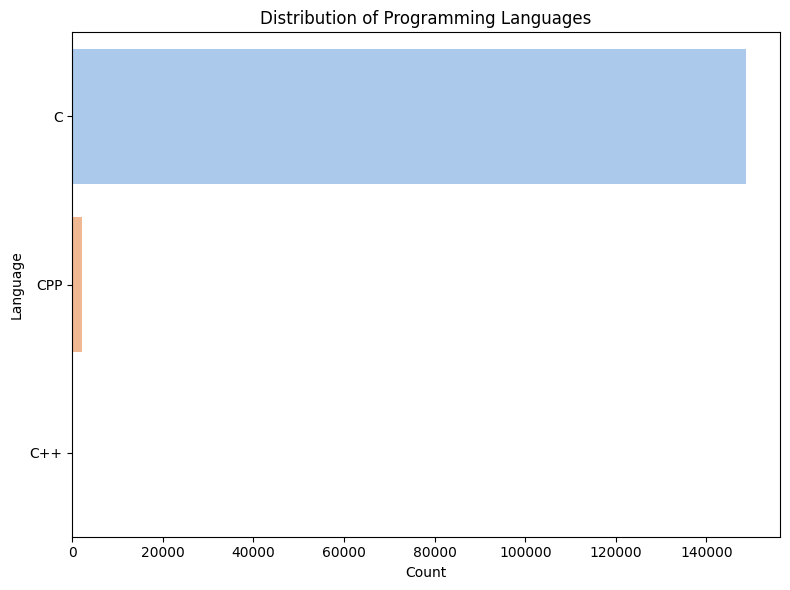

In [5]:
import matplotlib.pyplot as plt

# Plot the distribution of 'lang' feature
plt.figure(figsize=(8, 6))
sns.countplot(data=df, y='lang', palette='pastel', order=df['lang'].value_counts().index)
plt.title('Distribution of Programming Languages')
plt.ylabel('Language')
plt.xlabel('Count')
plt.tight_layout()
plt.show()

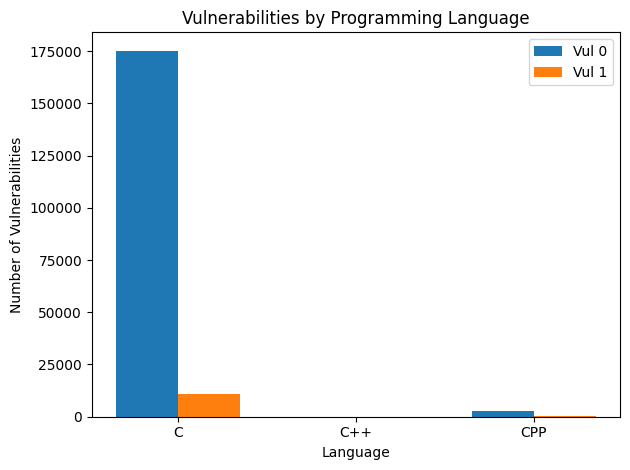

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data
data = {
    'vul': [0, 1, 0, 1, 0],
    'lang': ['C', 'C', 'CPP', 'CPP', 'C++'],
    'count': [175211, 10786, 2522, 114, 3]
}
df_lang = pd.DataFrame(data)

# Getting the value counts
counts = df_lang.groupby(['lang', 'vul']).sum()['count']

# Unstacking the Series to get a DataFrame suitable for bar plot
unstacked_counts = counts.unstack().fillna(0)

fig, ax = plt.subplots()

# Setting the positions and width for the bars
width = 0.35  # Width of the bars
ind = range(len(unstacked_counts))  # Number of groups (languages)

# Plotting each category
p1 = ax.bar(ind, unstacked_counts[0], width, label='Vul 0')
p2 = ax.bar([i + width for i in ind], unstacked_counts[1], width, label='Vul 1')

# Setting labels, title and axes ticks
ax.set_xlabel('Language')
ax.set_ylabel('Number of Vulnerabilities')
ax.set_title('Vulnerabilities by Programming Language')
ax.set_xticks([i + width / 2 for i in ind])
ax.set_xticklabels(unstacked_counts.index)
ax.legend()

plt.tight_layout()
plt.show()

Index(['CVE ID', 'CVE Page', 'CWE ID', 'codeLink', 'commit_id',
       'commit_message', 'func_after', 'func_before', 'lang', 'project',
       'vul'],
      dtype='object')


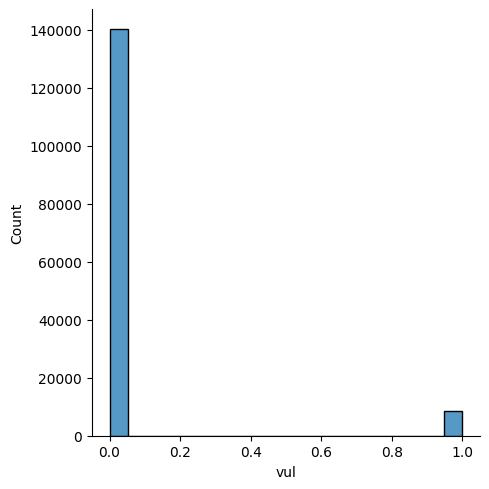

In [7]:
import matplotlib.pyplot as plt
# take 6 variables only related to the code itself
# Check available columns in df
print(df.columns)

# Select existing columns or adjust column names
df2 = df[['lang', 'func_before', 'func_after', 'vul']]  # Example: selecting only existing columns

# If the desired columns exist with different names, update the column names accordingly.
# For example, if 'lines_before' is actually named 'lines_before_fix':
# df2 = df[['lang', 'func_before', 'func_after', 'lines_before_fix', 'lines_after_fix', 'vul', 'vul_func_with_fix']]

# Filter the dataframe to only include rows with C
df3 = df2[df2['lang'] == "C"]

import warnings
warnings.filterwarnings("ignore")

# Distribution of vul
V_dist = sns.displot(df3['vul']) # Use df3 instead of df4
plt.show()

In [8]:
# Save the df3 dataframe
from google.colab import drive
drive.mount('/content/drive')

# Save the df6 dataframe to a CSV file in Google Drive for saving memory
save_path = "/content/drive/MyDrive/df_preprocessed.csv"
df3.to_csv(save_path, index=False)


Mounted at /content/drive


In [9]:
!pip install tqdm
import pandas as pd
import numpy as np
import seaborn as sns
import os

# Load the data: Open file from Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Define the file path in Google Colab after mounting the drive
file_path = "/content/drive/My Drive/df_preprocessed.csv"

# Read the CSV file into a DataFrame
try:
    df1 = pd.read_csv(file_path, na_filter=False)

except FileNotFoundError:
    print("The CSV file does not exist.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
# Reset index
df = df1.reset_index(drop=True)
print("shape:", df.shape)
df.head(5)

shape: (148796, 4)


,lang,func_before,func_after,vul
0,C,"psf_get_date_str (char *str, int maxlen)\n{\tt...","psf_get_date_str (char *str, int maxlen)\n{\tt...",0
1,C,void MultibufferDataSource::CreateResourceLoad...,void MultibufferDataSource::CreateResourceLoad...,0
2,C,"fbStore_a2r2g2b2 (FbBits *bits, const CARD32 *...","fbStore_a2r2g2b2 (FbBits *bits, const CARD32 *...",0
3,C,void UsageTracker::DidGetClientGlobalUsage(Sto...,void UsageTracker::DidGetClientGlobalUsage(Sto...,0
4,C,void BlobURLRequestJob::DidRead(int result) {\...,void BlobURLRequestJob::DidRead(int result) {\...,0


In [11]:
# Split the data
np.random.seed(42) #Set a random seed for reproducibility
Y = np.array(df["vul"]) # Define the target/response feature and convert it into an array for easy manipulation
df = df["func_before"].tolist() # select feature function code before fixing and convert into list
Y[Y > 0] = 1 # Set the binary classification (0=non-vulnerable code and 1=vulnerable code)

# Split randomly the data
num_samples = len(df)
train_samples = int(round(num_samples * 0.60))
val_samples = int(round(num_samples * 0.20))
samples = np.random.choice(len(Y), num_samples, replace=False)

X_train = [df[i] for i in samples[:train_samples]]
y_train = Y[samples[:train_samples]]
X_val = [df[i] for i in samples[train_samples:train_samples+val_samples]]
y_val = Y[samples[train_samples:train_samples+val_samples]]
X_test = [df[i] for i in samples[train_samples+val_samples:]]
y_test = Y[samples[train_samples+val_samples:]]


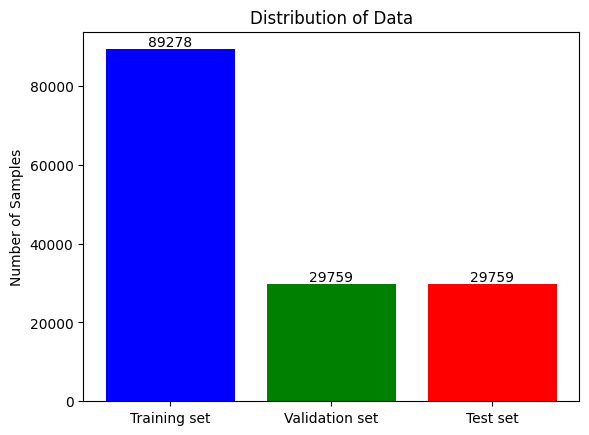

In [12]:
import matplotlib.pyplot as plt

# Compute number of samples for each set
num_train = len(X_train)
num_val = len(X_val)
num_test = len(X_test)

# Create a bar chart
labels = ['Training set', 'Validation set', 'Test set']
counts = [num_train, num_val, num_test]

bars = plt.bar(labels, counts, color=['blue', 'green', 'red'])
plt.ylabel('Number of Samples')
plt.title('Distribution of Data')

# Add values over each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5, str(height),
             ha='center', va='bottom')

plt.show()


In [13]:
# Check the values in each variable: sanity check
print("X_train:", len(X_train))
print("y_train:", len(y_train))
print("X_val:", len(X_val))
print("y_val:", len(y_val))
print("X_test:", len(X_test))
print("y_test:", len(y_test))

X_train: 89278
y_train: 89278
X_val: 29759
y_val: 29759
X_test: 29759
y_test: 29759


In [14]:
# Calculate class distribution per each dataset
unique, counts = np.unique(y_train, return_counts=True)
class_counts_y_train = dict(zip(unique, counts))

unique, counts = np.unique(y_val, return_counts=True)
class_counts_y_val = dict(zip(unique, counts))

unique, counts = np.unique(y_test, return_counts=True)
class_counts_y_test = dict(zip(unique, counts))

print("class_counts_y_train:", class_counts_y_train)
print("class_counts_y_val:", class_counts_y_val)
print("class_counts_y_test:", class_counts_y_test)

class_counts_y_train: {0: 84069, 1: 5209}
class_counts_y_val: {0: 28080, 1: 1679}
class_counts_y_test: {0: 28024, 1: 1735}


In [15]:
from collections import defaultdict, Counter
from pygments.lexers import CLexer
from pygments import lex
from tqdm import tqdm
import re

# Define preprocessing and tokenization
def preprocess_code(code):
    code = re.sub(r'//.*', '', code)  # remove single-line comments
    code = re.sub(r'/\*.*?\*/', '', code, flags=re.DOTALL)  # remove multi-line comments
    code = re.sub(r'".*?"', '', code)  # remove string literals
    code = re.sub(r'\b[-+]?\d*\.?\d+\b', 'NUMBER', code)  # normalize numbers
    return code.strip()

# Lexex tokeniser for C programing
def clexer_tokenize(code):
    lexer = CLexer()
    return [token[1] for token in lex(preprocess_code(code), lexer)]

# Tokenize training data
X_train_tokenized = [clexer_tokenize(code) for code in tqdm(X_train, desc="Tokenizing Train Data")]

# Calculate Token Frequencies
token_freq = Counter(token for tokens in X_train_tokenized for token in tokens)

# Print the total number of tokens
print("Total number of tokens:", len(token_freq))


Tokenizing Train Data: 100%|██████████| 89278/89278 [03:06<00:00, 477.91it/s]


Total number of tokens: 418239


75th percentile frequency: 5.0 (Number of tokens above this value: 104568, Number of tokens below or equal to this value: 313671)
90th percentile frequency: 12.0 (Number of tokens above this value: 41861, Number of tokens below or equal to this value: 376378)
95th percentile frequency: 22.0 (Number of tokens above this value: 21831, Number of tokens below or equal to this value: 396408)
97th percentile frequency: 37.0 (Number of tokens above this value: 12685, Number of tokens below or equal to this value: 405554)
99th percentile frequency: 112.0 (Number of tokens above this value: 4193, Number of tokens below or equal to this value: 414046)


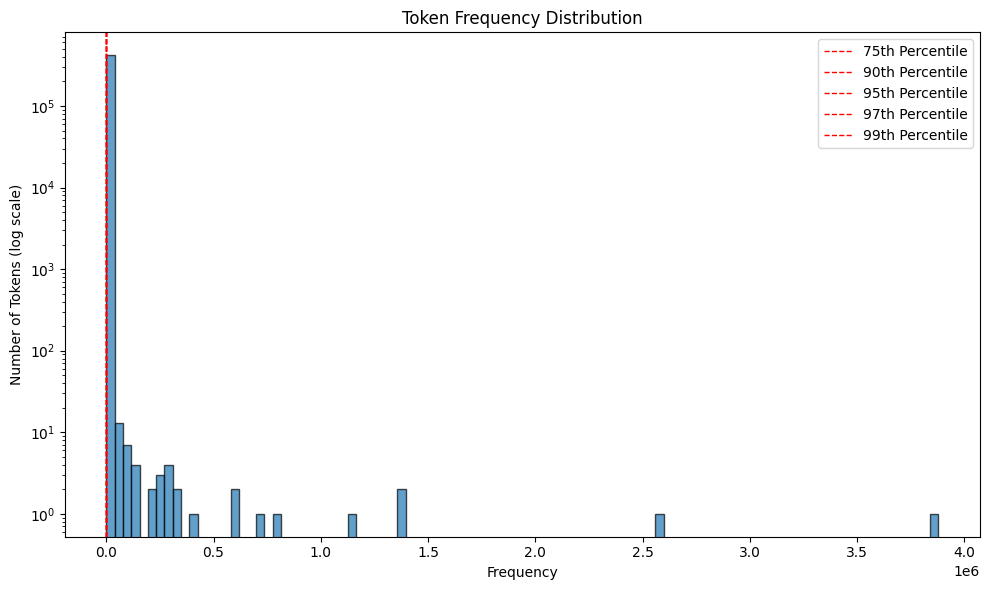

In [16]:
import matplotlib.pyplot as plt

# Determine a frequency threshold from percentiles
tokens, frequencies = zip(*sorted(token_freq.items(), key=lambda x: x[1], reverse=True))
percentiles = [75, 90, 95, 97, 99]
percentile_values = np.percentile(frequencies, percentiles)

# Plot the token frequencies
plt.figure(figsize=(10,6))
plt.hist(frequencies, bins=100, edgecolor='black', alpha=0.7, log=True)  # log scale for better visualization
plt.title('Token Frequency Distribution')
plt.xlabel('Frequency')
plt.ylabel('Number of Tokens (log scale)')

# Plot the percentiles on the histogram
for perc, value in zip(percentiles, percentile_values):
    plt.axvline(value, color='red', linestyle='dashed', linewidth=1, label=f'{perc}th Percentile')

# Print the determined threshold frequencies and count tokens above and below each threshold
for perc, value in zip(percentiles, percentile_values):
    # Get the number of tokens above the current percentile value
    num_tokens_above_value = sum(i >= value for i in frequencies)
    # Get the number of tokens below the current percentile value
    num_tokens_below_value = sum(i < value for i in frequencies)
    print(f"{perc}th percentile frequency: {value} (Number of tokens above this value: {num_tokens_above_value}, Number of tokens below or equal to this value: {num_tokens_below_value})")

plt.legend()
plt.tight_layout()
plt.show()


In [17]:
# Choose a threshold value (95th percentile)
threshold_frequency = percentile_values[2]

# Filter out tokens that are below the threshold
frequent_tokens = {token for token, freq in token_freq.items() if freq >= threshold_frequency}
print("Number of frequent tokens:", len(frequent_tokens))

# Filter the tokenized data based on the threshold
X_train_filtered = [[token for token in tokens if token in frequent_tokens] for tokens in X_train_tokenized]
print("Example of filtered data:", X_train_filtered[0])

Number of frequent tokens: 21831
Example of filtered data: ['void', ' ', '(', 'const', ' ', 'String', '&', ' ', 'mode', ',', '\n', '                                    ', 'ExceptionState', '&', ' ', 'exception_state', ')', ' ', '{', '\n', '  ', 'Handler', '(', ')', '.', '(', 'mode', ',', ' ', 'exception_state', ')', ';', '\n', '}', '\n']


In [18]:
# Use frequent tokens for filtering
frequent_tokens = set(token for token, freq in token_freq.items() if freq >= threshold_frequency)

#Create a vocabulary with the frequent tokens
vocab = {token: idx+1 for idx, token in enumerate(frequent_tokens)}  # Adding 1 in the index because 0 is reserved for padding
vocab_size = len(vocab)

print("vocab_size:", vocab_size)

vocab_size: 21831


In [19]:
#from collections import defaultdict
#from operator import itemgetter
from keras.preprocessing.sequence import pad_sequences
from pygments.lexers import CLexer
from pygments import lex
from tqdm import tqdm
import re


# Function to tokenise dataset with frequent tokens/vocabulary
def frequent_tokens_filter(code):
    return [token for token in clexer_tokenize(code) if token in frequent_tokens]

# Tokenize using the frequent tokens
X_train_tokenized = [frequent_tokens_filter(code) for code in tqdm(X_train, desc="Tokenizing Train Data with Frequent Tokens")]
X_val_tokenized = [frequent_tokens_filter(code) for code in tqdm(X_val, desc="Tokenizing Validation Data with Frequent Tokens")]
X_test_tokenized = [frequent_tokens_filter(code) for code in tqdm(X_test, desc="Tokenizing Test Data with Frequent Tokens")]

# Function to convert tokens to integers
def tokens_to_integers(tokens):
    return [vocab[token] for token in tokens if token in vocab]

# Convert tokens to integers
X_train_seq = [tokens_to_integers(tokens) for tokens in X_train_tokenized]
X_val_seq = [tokens_to_integers(tokens) for tokens in X_val_tokenized]
X_test_seq = [tokens_to_integers(tokens) for tokens in X_test_tokenized]


Tokenizing Test Data with Frequent Tokens: 100%|██████████| 29759/29759 [01:00<00:00, 493.24it/s]


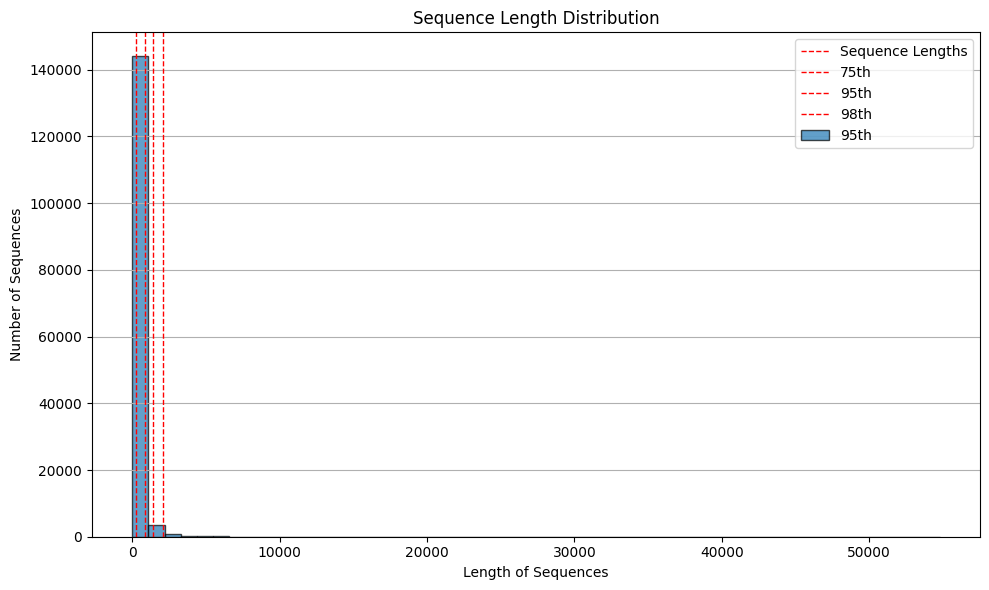

In [20]:
import matplotlib.pyplot as plt

# Calculate sequence lengths
sequence_lengths = [len(seq) for seq in X_train_seq + X_val_seq + X_test_seq]

# Calculate percentiles
percentiles = [np.percentile(sequence_lengths, p) for p in [75, 95, 98, 99]]

# Plotting the distribution
plt.figure(figsize=(10,6))
plt.hist(sequence_lengths, bins=50, edgecolor='black', alpha=0.7)
plt.title('Sequence Length Distribution')
plt.xlabel('Length of Sequences')
plt.ylabel('Number of Sequences')

# Plotting the percentiles
for p in percentiles:
    plt.axvline(p, color='red', linestyle='dashed', linewidth=1)

# Display the plot with legend
labels = ['75th', '95th', '98th', '95th']
plt.legend(['Sequence Lengths'] + labels)
plt.grid(axis='y')
plt.tight_layout()
plt.show()




In [21]:
# Calculate percentiles values
percentile_values = [75, 95, 98, 99, 100]
percentiles = [np.percentile(sequence_lengths, p) for p in percentile_values]

for p_val, p_result in zip(percentile_values, percentiles):
    print(f"The {p_val}th percentile is: {p_result}")

The 75th percentile is: 252.0
The 95th percentile is: 850.0
The 98th percentile is: 1429.0
The 99th percentile is: 2122.0499999999884
The 100th percentile is: 54773.0


In [22]:
# Padding and truncating sequences with 98th percentile length of sequences
max_length = int(np.percentile([len(seq) for seq in X_train_seq + X_val_seq + X_test_seq], 98))
X_train_padded = pad_sequences(X_train_seq, maxlen=max_length, padding='post', truncating='post' )
X_val_padded = pad_sequences(X_val_seq, maxlen=max_length, padding='post', truncating='post')
X_test_padded = pad_sequences(X_test_seq, maxlen=max_length, padding='post', truncating='post')

# Vector representation: set dimension embedding
embedding_dim = 100


In [23]:
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_padded, y_train)

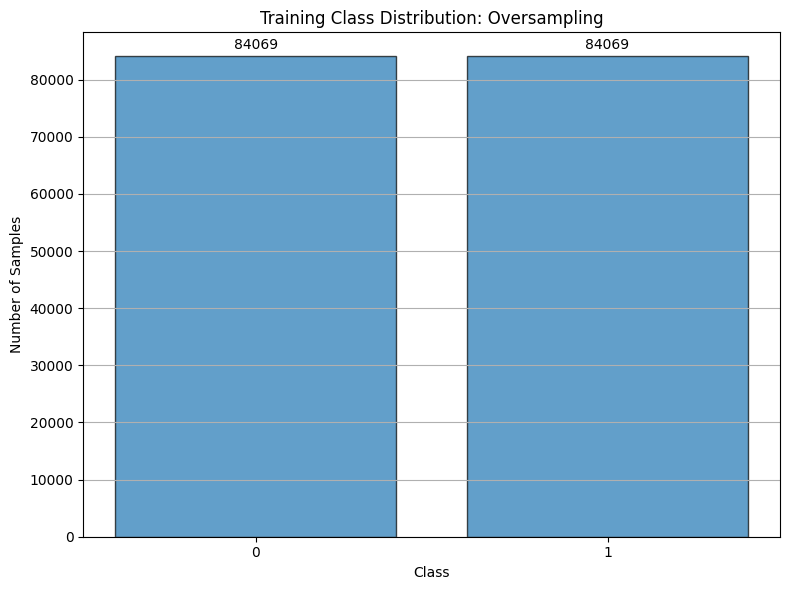

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate class distribution
unique, counts = np.unique(y_train_resampled, return_counts=True)
class_counts = dict(zip(unique, counts))

# Plotting the distribution
plt.figure(figsize=(8,6))
bars = plt.bar(class_counts.keys(), class_counts.values(), edgecolor='black', alpha=0.7)
plt.title('Training Class Distribution: Oversampling')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.xticks(list(class_counts.keys()))  # Ensure all classes are displayed on the x-axis
plt.grid(axis='y')

# Annotate the values over the bars
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{int(height)}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords='offset points',
                ha='center', va='bottom')

plt.tight_layout()

# Display the plot
plt.show()


In [25]:
from time import process_time
from sklearn.metrics import confusion_matrix, f1_score, classification_report
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

# Evaluation of Model

def plot_training(history):
    fig = plt.figure(figsize=[20, 5])
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history['loss'], label="Training Loss")
    ax.plot(history.history['val_loss'], label="Validation Loss")
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Loss')
    ax.set_title('Training Loss vs Validation Loss')
    ax.legend()

    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history['accuracy'], label="Train Accuracy")
    ax.plot(history.history['val_accuracy'], label="Val Accuracy")
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Accuracy')
    ax.set_title('Training Accuracy vs Validation Accuracy')
    ax.legend()

    plt.show()


def eval_model(model, X_train, y_train, X_test, y_test, train_time=None):
    """
    Evaluates the model and prints/visualizes various performance metrics.

    Arguments:
    - model: Keras model that needs to be evaluated.
    - X_train, y_train: Training data and labels.
    - X_test, y_test: Testing data and labels.
    - train_time: Optional, time taken to train the model.

    Returns:
    None
    """

    # Evaluate on the test set
    test_scores = model.evaluate(X_test, y_test, verbose=2)
    print('Test loss:', test_scores[0])
    print('Test accuracy:', test_scores[1])
    print("")

    fig, axes = plt.subplots(1, 2, figsize=[20, 8])

    # Predict on the training set and calculate the inference time
    inference_start = process_time()
    train_pred = (model.predict(X_train) > 0.5).astype("int32")
    inference_end = process_time()

    # Compute and visualize confusion matrix for training data
    confusion_mtx_train = confusion_matrix(y_train, train_pred)
    sns.heatmap(confusion_mtx_train, annot=True, fmt='g', ax=axes[0])
    axes[0].set_xlabel('Predicted Label')
    axes[0].set_ylabel('True Label')
    axes[0].set_title(f'Training, F1 Score: {f1_score(y_train, train_pred):.4f}')
    print(classification_report(y_train, train_pred))

    # Predict on the test set and calculate the inference time
    pred_start = process_time()
    test_pred = (model.predict(X_test) > 0.5).astype("int32")
    pred_end = process_time()

    # Compute and visualize confusion matrix for test data
    confusion_mtx_test = confusion_matrix(y_test, test_pred)
    sns.heatmap(confusion_mtx_test, annot=True, fmt='g', ax=axes[1])
    axes[1].set_xlabel('Predicted Label')
    axes[1].set_ylabel('True Label')
    axes[1].set_title(f'Testing, F1 Score: {f1_score(y_test, test_pred):.4f}')

    if train_time:
        print(f'Training Time: {train_time:.4f} seconds')

    print(f'Inference Time (training set): {inference_end - inference_start:.4f} seconds')
    print(f'Inference Time (testing set): {pred_end - pred_start:.4f} seconds\n')
    print(classification_report(y_test, test_pred))

    plt.tight_layout()
    plt.show()


# allow you to stop model training after a set period of time
class TrainForTime(keras.callbacks.Callback):
    def __init__(self, train_time_mins=5,):
        super().__init__()

        self.train_time_mins = train_time_mins
        self.epochs = 0
        self.train_time = 0
        self.end_early = False

    def on_train_begin(self, logs=None):
        # save the start time
        self.start_time = tf.timestamp()

    def on_epoch_end(self, epoch, logs=None):
        self.epochs += 1
        current_time = tf.timestamp()
        training_time = (current_time - self.start_time)
        if (training_time / 60) > self.train_time_mins:
            self.train_time = current_time - self.start_time
            self.model.stop_training = True
            self.end_early = True

    def on_train_end(self, logs=None):
        if self.end_early:
            print('training time exceeded and ending early')
            print(f'training ended on epoch {self.epochs}')
            print(f'training time = {self.train_time / 60} mins')

# Save the best model
from keras.callbacks import ModelCheckpoint
checkpoint_filepath = "/content/drive/MyDrive/Colab Notebooks/best_model_{epoch:02d}-{val_loss:.2f}.h5"
model_checkpoint = ModelCheckpoint(filepath=checkpoint_filepath,
                                   save_best_only=True,  # Only save a model if 'val_loss' has improved.
                                   monitor='val_loss',
                                   mode='min',  # 'min' mode means the callback saves when 'val_loss' is minimized.
                                   verbose=1)

import time
def track_time(start_time):
    return time.time() - start_time

# Function to evaluate the traditional ML models
def eval_model_tml(model, X_train, Y_train, X_test, Y_test):
    fig = plt.figure(figsize=[15, 6])

    ax = fig.add_subplot(1, 2, 1)
    conf = ConfusionMatrixDisplay.from_estimator(model, X_train, Y_train, normalize='true', ax=ax)
    pred = model.predict(X_train)
    conf.ax_.set_title('Training Set Performance: ' + str(sum(pred == Y_train)/len(Y_train)))

    ax = fig.add_subplot(1, 2, 2)
    conf = ConfusionMatrixDisplay.from_estimator(model, X_test, Y_test, normalize='true', ax=ax)
    pred = model.predict(X_test)
    conf.ax_.set_title('Test Set Performance: ' + str(sum(pred == Y_test)/len(Y_test)))

    plt.show()


import matplotlib.pyplot as plt

def plot_training_histories(histories):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))

    for history in histories:
        ax1.plot(history.history['loss'], label="Training Loss")
        ax1.plot(history.history['val_loss'], label="Validation Loss")
        ax2.plot(history.history['accuracy'], label="Train Accuracy")
        ax2.plot(history.history['val_accuracy'], label="Val Accuracy")

    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.set_title('Training Loss vs Validation Loss')
    ax1.legend()

    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.set_title('Training Accuracy vs Validation Accuracy')
    ax2.legend()

    plt.show()


import pickle
import matplotlib.pyplot as plt

def save_history_to_file(history, filename):
    with open(filename, 'wb') as file:
        pickle.dump(history.history, file)

def load_history_from_file(filename):
    with open(filename, 'rb') as file:
        history = pickle.load(file)
    return history


def save_metrics_to_file(metrics, filename):
    with open(filename, 'wb') as file:
        pickle.dump(metrics, file)

def load_metrics_from_file(filename):
    with open(filename, 'rb') as file:
        metrics = pickle.load(file)
    return metrics


In [26]:
import tensorflow as tf
from tensorflow.keras import backend as K

class Attention(tf.keras.layers.Layer):
    def __init__(self, step_dim,
                 W_regularizer=None, b_regularizer=None,
                 W_constraint=None, b_constraint=None,
                 bias=True, **kwargs):
        self.supports_masking = True
        self.init = tf.keras.initializers.get('glorot_uniform')

        self.W_regularizer = W_regularizer
        self.b_regularizer = b_regularizer
        self.W_constraint = W_constraint
        self.b_constraint = b_constraint

        self.bias = bias
        self.step_dim = step_dim
        self.features_dim = 0
        super(Attention, self).__init__(**kwargs)

    def build(self, input_shape):
        assert len(input_shape) == 3

        self.W = self.add_weight(shape=(input_shape[-1],),
                                 initializer=self.init,
                                 name='{}_W'.format(self.name),
                                 regularizer=self.W_regularizer,
                                 constraint=self.W_constraint)
        self.features_dim = input_shape[-1]

        if self.bias:
            self.b = self.add_weight(shape=(input_shape[1],),
                                     initializer='zero',
                                     name='{}_b'.format(self.name),
                                     regularizer=self.b_regularizer,
                                     constraint=self.b_constraint)
        else:
            self.b = None

        self.built = True

    def compute_mask(self, input, input_mask=None):
        return None

    def call(self, x, mask=None):
        features_dim = self.features_dim
        step_dim = self.step_dim

        eij = K.reshape(K.dot(K.reshape(x, (-1, features_dim)), K.reshape(self.W, (features_dim, 1))), (-1, step_dim))
        if self.bias:
            eij += self.b
        eij = K.tanh(eij)
        a = K.exp(eij)
        if mask is not None:
            a *= K.cast(mask, K.floatx())
        a /= K.cast(K.sum(a, axis=1, keepdims=True) + K.epsilon(), K.floatx())
        a = K.expand_dims(a)
        weighted_input = x * a
        return K.sum(weighted_input, axis=1)

    def compute_output_shape(self, input_shape):
        return input_shape[0], self.features_dim


In [28]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Model
from keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional, Multiply, Permute, RepeatVector,GlobalAveragePooling1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model
from sklearn.utils.class_weight import compute_class_weight

# ============================
# 🔹 Class Weights (If NOT using SMOTE)
# ============================
USE_SMOTE = True  # Set to True if using SMOTE, False if using class weights

if not USE_SMOTE:
    classes = np.unique(y_train)
    weights = compute_class_weight('balanced', classes=classes, y=y_train)
    class_weight_dict = dict(zip(classes, weights))
else:
    class_weight_dict = None  # No class weights if using SMOTE

# ============================
# 🔹 Hyperparameters
# ============================
learning_rate = 0.001  # Increased LR for better convergence
lstm_units = 64
dense_units = 64
batch_size = 128
epochs = 10

# ============================
# 🔹 Model Definition
# ============================
inputs = keras.Input(shape=(max_length,), dtype="int32")

# Embedding layer
x = Embedding(input_dim=vocab_size + 1, output_dim=embedding_dim, input_length=max_length, trainable=True)(inputs)

# BiLSTM Layer
x = Bidirectional(LSTM(lstm_units, return_sequences=True))(x)

# ============================
# 🔹 Attention Mechanism
# ============================
attention = Dense(64, activation="tanh")(x)  # Compute attention scores
attention = Dense(1, activation="softmax")(attention)  # Convert to probability distribution
attention = Multiply()([x, attention])  # Apply attention weights
x = GlobalAveragePooling1D()(attention)  # Pool over weighted outputs

# Dense layers
x = Dense(dense_units, activation="relu")(x)
x = Dropout(0.5)(x)

# Output layer (Binary Classification)
outputs = Dense(1, activation="sigmoid")(x)

# Create model
model_BiLSTM_attention = Model(inputs, outputs)

# ============================
# 🔹 Compile Model
# ============================
optimizer = Adam(learning_rate=learning_rate)
model_BiLSTM_attention.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy"])

# Print Summary
model_BiLSTM_attention.summary()
plot_model(model_BiLSTM_attention, show_shapes=True)

# ============================
# 🔹 Training
# ============================
from sklearn.metrics import accuracy_score
import time

# Select training data (SMOTE vs. Original)
if USE_SMOTE:
    X_train_final, y_train_final = X_train_resampled, y_train_resampled
else:
    X_train_final, y_train_final = X_train_padded, y_train

train_start_time = time.time()

history_BiLSTM_attention = model_BiLSTM_attention.fit(
    X_train_final, y_train_final,
    validation_data=(X_val_padded, y_val),
    epochs=epochs,
    batch_size=batch_size,
    class_weight=class_weight_dict,
    callbacks=[EarlyStopping(monitor='val_loss', patience=7)]
)

train_time = time.time() - train_start_time

# ============================
# 🔹 Predictions & Evaluation
# ============================
test_pred_start = time.time()
test_predictions = model_BiLSTM_attention.predict(X_test_padded)
test_pred_time = time.time() - test_pred_start

# Convert probabilities to binary labels
test_labels_pred = (test_predictions > 0.5).astype("int32")

# Accuracy score
test_accuracy = accuracy_score(y_test, test_labels_pred)

print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Training Time: {train_time:.2f} seconds")
print(f"Inference Time (testing set): {test_pred_time:.2f} seconds")


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 1429)           │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_1 (Embedding)   │ (None, 1429, 100)      │      2,183,200 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bidirectional_1           │ (None, 1429, 128)      │         84,480 │ embedding_1[0][0]      │
│ (Bidirectional)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 1429, 64)       │          8,256 │ bidirectional_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 1429, 1)        │             65 │ dense_2[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multiply_1 (Multiply)     │ (None, 1429, 128)      │              0 │ bidirectional_1[0][0], │
│                           │                        │                │ dense_3[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling1d  │ (None, 128)            │              0 │ multiply_1[0][0]       │
│ (GlobalAveragePooling1D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_4 (Dense)           │ (None, 64)             │          8,256 │ global_average_poolin… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 64)             │              0 │ dense_4[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_5 (Dense)           │ (None, 1)              │             65 │ dropout[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 2,284,322 (8.71 MB)

 Trainable params: 2,284,322 (8.71 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1314/1314 ━━━━━━━━━━━━━━━━━━━━ 203s 146ms/step - accuracy: 0.8955 - loss: 0.2435 - val_accuracy: 0.9661 - val_loss: 0.1441
Epoch 2/10
1314/1314 ━━━━━━━━━━━━━━━━━━━━ 201s 150ms/step - accuracy: 0.9638 - loss: 0.1064 - val_accuracy: 0.9476 - val_loss: 0.1110
Epoch 3/10
1314/1314 ━━━━━━━━━━━━━━━━━━━━ 207s 154ms/step - accuracy: 0.9760 - loss: 0.0599 - val_accuracy: 0.9727 - val_loss: 0.0793
Epoch 4/10
1314/1314 ━━━━━━━━━━━━━━━━━━━━ 260s 152ms/step - accuracy: 0.9854 - loss: 0.0407 - val_accuracy: 0.9773 - val_loss: 0.0704
Epoch 5/10
1314/1314 ━━━━━━━━━━━━━━━━━━━━ 203s 153ms/step - accuracy: 0.9888 - loss: 0.0331 - val_accuracy: 0.9781 - val_loss: 0.0687
Epoch 6/10
1314/1314 ━━━━━━━━━━━━━━━━━━━━ 202s 154ms/step - accuracy: 0.9913 - loss: 0.0260 - val_accuracy: 0.9796 - val_loss: 0.0753
Epoch 7/10
1314/1314 ━━━━━━━━━━━━━━━━━━━━ 261s 153ms/step - accuracy: 0.9937 - loss: 0.0194 - val_accuracy: 0.9810 - val_loss: 0.0778
Epoch 8/10
1314/1314 ━━━━━━━━━━━━━━━━━━━━ 195s 147ms/step - ac

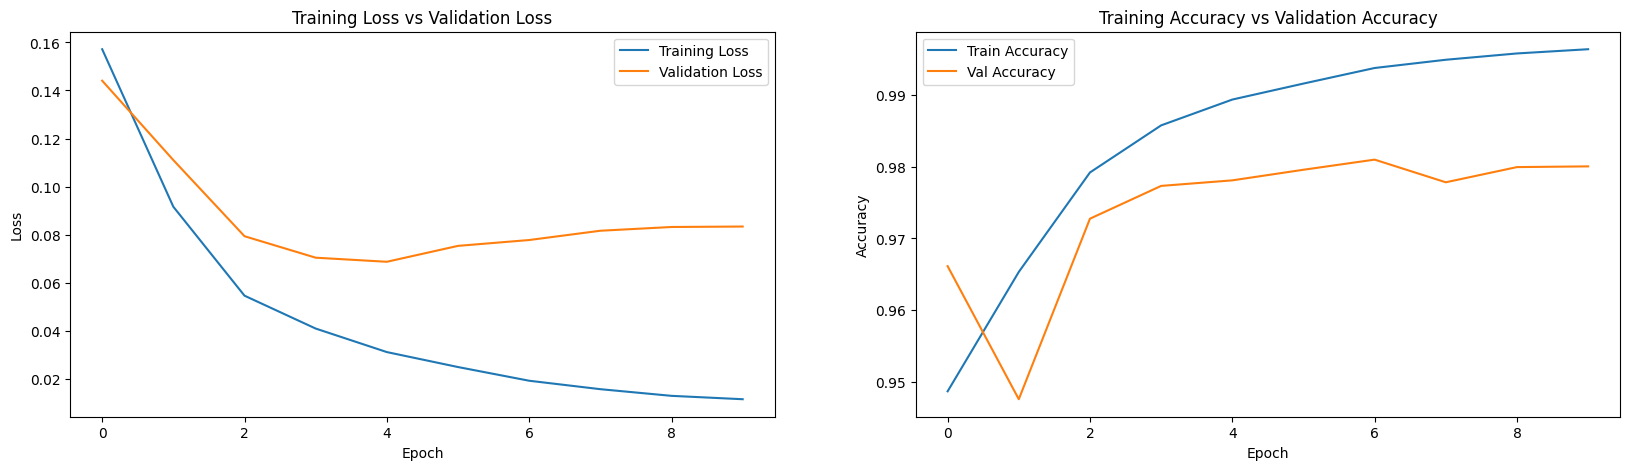

Training time not found in history or is not numeric.
930/930 - 33s - 35ms/step - accuracy: 0.9804 - loss: 0.0883
Test loss: 0.08833698183298111
Test accuracy: 0.9804428815841675

2790/2790 ━━━━━━━━━━━━━━━━━━━━ 100s 36ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84069
           1       0.98      0.94      0.96      5209

    accuracy                           1.00     89278
   macro avg       0.99      0.97      0.98     89278
weighted avg       1.00      1.00      1.00     89278

930/930 ━━━━━━━━━━━━━━━━━━━━ 33s 36ms/step
Inference Time (training set): 102.8805 seconds
Inference Time (testing set): 34.0545 seconds

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     28024
           1       0.87      0.79      0.82      1735

    accuracy                           0.98     29759
   macro avg       0.93      0.89      0.91     29759
weighted avg       0.98      0.98    

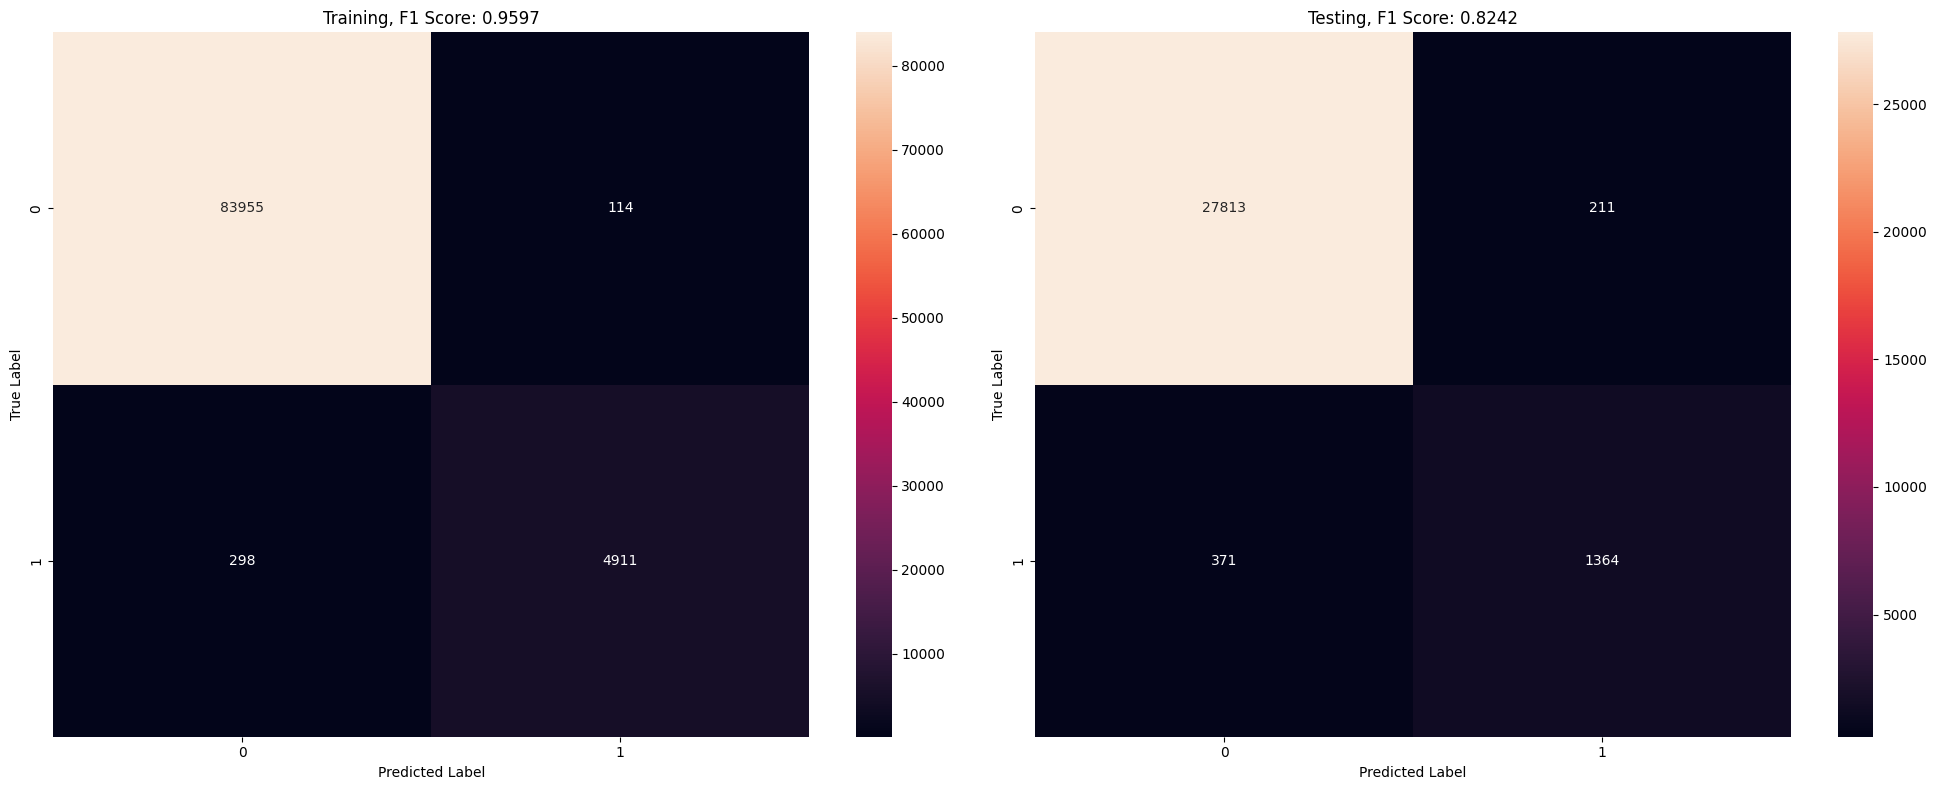

In [29]:
plot_training(history_BiLSTM_attention)
# Get the training time from the history object
train_time = history_BiLSTM_attention.history.get('train_time', None)  # Attempt to get train_time, default to None if not found
# Check if training time was recorded in the history
if train_time is not None and isinstance(train_time, (int, float)):
    eval_model(model_BiLSTM_attention, X_train_padded, y_train, X_test_padded, y_test, train_time)
else:
    print("Training time not found in history or is not numeric.")
    eval_model(model_BiLSTM_attention, X_train_padded, y_train, X_test_padded, y_test)

In [30]:
# Save the model after training
model_BiLSTM_attention.save("/content/drive/MyDrive/Colab Notebooks/amy_model.h5")
print("Model saved to: /content/drive/MyDrive/Colab Notebooks/my_model.h5")


Model saved to: /content/drive/MyDrive/Colab Notebooks/my_model.h5
